In [4]:
import pandas as pd
import time
import numpy as np

all_rookie_dfs = []

for year in np.arange(1950,2025,1):
    print(year)
    URL_rookie_page = 'https://www.basketball-reference.com/leagues/NBA_%i_rookies-season-stats.html' % (year)
    df = pd.read_html(URL_rookie_page)[0]
    all_rookie_dfs.append( df )
    # avoid bball jail:
    time.sleep(4)
    
    
import pickle
with open('all_rookie_dfs.dat', 'wb') as f:
    pickle.dump(all_rookie_dfs, f)

1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024


In [30]:
# add season as a column:
for iii,df in enumerate(all_rookie_dfs):
    player = df['Unnamed: 1_level_0']['Player']
    all_rookie_dfs[iii]['SEASON'] = pd.Series([1950+iii for foo in player])

one_rookie_df = pd.concat(all_rookie_dfs)
print(one_rookie_df.info())
one_rookie_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4942 entries, 0 to 63
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   (Unnamed: 0_level_0, Rk)      4752 non-null   object
 1   (Unnamed: 1_level_0, Player)  4752 non-null   object
 2   (Unnamed: 2_level_0, Debut)   4751 non-null   object
 3   (Unnamed: 3_level_0, Age)     4752 non-null   object
 4   (Unnamed: 4_level_0, Yrs)     4752 non-null   object
 5   (Totals, G)                   4942 non-null   object
 6   (Totals, MP)                  4792 non-null   object
 7   (Totals, FG)                  4942 non-null   object
 8   (Totals, FGA)                 4942 non-null   object
 9   (Totals, 3P)                  3705 non-null   object
 10  (Totals, 3PA)                 3705 non-null   object
 11  (Totals, FT)                  4942 non-null   object
 12  (Totals, FTA)                 4942 non-null   object
 13  (Totals, ORB)       

Unnamed: 0_level_0 Unnamed: 1_level_0        Unnamed: 2_level_0  \
                   Rk             Player                     Debut   
0                   1       Cliff Barker   Nov 1, '49, INO vs. DNN   
1                   2      Leo Barnhorst   Nov 1, '49, CHS vs. NYK   
2                   3         Ed Bartels    Oct 29, '49, DNN @ TRI   
3                   4        Ralph Beard   Nov 1, '49, INO vs. DNN   
4                   5         Gene Berce  Oct 29, '49, TRI vs. DNN   
..                ...                ...                       ...   
59                 56      Jarace Walker  Oct 25, '23, IND vs. WAS   
60                 57      Cason Wallace    Oct 25, '23, OKC @ CHI   
61                 58  Victor Wembanyama  Oct 25, '23, SAS vs. DAL   
62                 59       Cam Whitmore    Oct 25, '23, HOU @ ORL   
63                 60       Jalen Wilson     Nov 1, '23, BRK @ MIA   

   Unnamed: 3_level_0 Unnamed: 4_level_0 Totals                      ...       \
                  Age                Yrs      G   MP   FG  FGA   3P  ...   PF   
0                  29                  1     49  NaN  102  274  NaN  ...   99   
1                  25                  1     67  NaN  174  499  NaN  ...  192   
2                  24                  1     15  NaN   22   86  NaN  ...   29   
3                  22                  1     60  NaN  340  936  NaN  ...  132   
4                  23                  1      3  NaN    5   16  NaN  ...    6   
..                ...                ...    ...  ...  ...  ...  ...  ...  ...   
59                 20                  1      3   27    4   12    0  ...    2   
60                 20                  1      8  184   27   39    8  ...   15   
61                 20                  1      8  233   52  118   12  ...   18   
62                 19                  1      3   23    3    9    0  ...    1   
63                 23                  1      2    7    0    1    0  ...    0   

        Shooting              Per Game                 SEASON  
    PTS      FG%   3P%    FT%       MP   PTS  TRB  AST         
0   279     .372   NaN   .708      NaN   5.7  NaN  2.2   1950  
1   438     .349   NaN   .698      NaN   6.5  NaN  2.1   1950  
2    63     .256   NaN   .559      NaN   4.2  NaN  1.3   1950  
3   895     .363   NaN   .762      NaN  14.9  NaN  3.9   1950  
4    10     .313   NaN   .000      NaN   3.3  NaN  0.7   1950  
..  ...      ...   ...    ...      ...   ...  ...  ...    ...  
59   10     .333  .000  1.000      9.0   3.3  2.3  1.7   2024  
60   70     .692  .571  1.000     23.0   8.8  2.5  1.5   2024  
61  150     .441  .293   .791     29.1  18.8  8.5  1.8   2024  
62    7     .333  .000   .500      7.7   2.3  1.0  0.3   2024  
63    0     .000   NaN    NaN      3.5   0.0  0.5  0.0   2024  

[4942 rows x 29 columns]

We are now happy with our huge dataframe, but:

* the structure of the df uses nested columns

* intermediate rows with strings are still present

* all columns are 'object' types, we want numbers

In [57]:
df_not_nested = one_rookie_df[ ['SEASON'] ]


for col in one_rookie_df.columns.values.tolist():

    if col[0]=='Per Game':
        newname = col[1]+'_pergame'
    elif col[0]=='SEASON' or col[1]=='Rk':
        continue
    else:
        newname = col[1]
            
    column_to_parse = one_rookie_df[col[0]][col[1]]
    
    if newname in ['Player','Debut']:
        df_not_nested[ newname ] = column_to_parse
    else:
        df_not_nested[ newname ] = pd.to_numeric( column_to_parse , errors='coerce' )       
        
    print(col,newname)

df_not_nested = df_not_nested[ df_not_nested['Yrs']>0. ]
df_not_nested.info()
df_not_nested

('Unnamed: 1_level_0', 'Player') Player
('Unnamed: 2_level_0', 'Debut') Debut
('Unnamed: 3_level_0', 'Age') Age
('Unnamed: 4_level_0', 'Yrs') Yrs
('Totals', 'G') G
('Totals', 'MP') MP
('Totals', 'FG') FG
('Totals', 'FGA') FGA
('Totals', '3P') 3P
('Totals', '3PA') 3PA
('Totals', 'FT') FT
('Totals', 'FTA') FTA
('Totals', 'ORB') ORB
('Totals', 'TRB') TRB
('Totals', 'AST') AST
('Totals', 'STL') STL
('Totals', 'BLK') BLK
('Totals', 'TOV') TOV
('Totals', 'PF') PF
('Totals', 'PTS') PTS
('Shooting', 'FG%') FG%
('Shooting', '3P%') 3P%
('Shooting', 'FT%') FT%
('Per Game', 'MP') MP_pergame
('Per Game', 'PTS') PTS_pergame
('Per Game', 'TRB') TRB_pergame
('Per Game', 'AST') AST_pergame
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4562 entries, 0 to 63
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (SEASON, )       4562 non-null   int64  
 1   (Player, )       4562 non-null   object 
 2   (Debut, )        4561 no

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,SEASON,Player,Debut,Age,Yrs,G,MP,FG,FGA,3P,...,TOV,PF,PTS,FG%,3P%,FT%,MP_pergame,PTS_pergame,TRB_pergame,AST_pergame
,,,,,,,,,,,...,,,,,,,,,,
0,1950,Cliff Barker,"Nov 1, '49, INO vs. DNN",29.0,1.0,49.0,NaN,102.0,274.0,NaN,...,NaN,99.0,279.0,0.372,NaN,0.708,NaN,5.7,NaN,2.2
1,1950,Leo Barnhorst,"Nov 1, '49, CHS vs. NYK",25.0,1.0,67.0,NaN,174.0,499.0,NaN,...,NaN,192.0,438.0,0.349,NaN,0.698,NaN,6.5,NaN,2.1
2,1950,Ed Bartels,"Oct 29, '49, DNN @ TRI",24.0,1.0,15.0,NaN,22.0,86.0,NaN,...,NaN,29.0,63.0,0.256,NaN,0.559,NaN,4.2,NaN,1.3
3,1950,Ralph Beard,"Nov 1, '49, INO vs. DNN",22.0,1.0,60.0,NaN,340.0,936.0,NaN,...,NaN,132.0,895.0,0.363,NaN,0.762,NaN,14.9,NaN,3.9
4,1950,Gene Berce,"Oct 29, '49, TRI vs. DNN",23.0,1.0,3.0,NaN,5.0,16.0,NaN,...,NaN,6.0,10.0,0.313,NaN,0.000,NaN,3.3,NaN,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2024,Jarace Walker,"Oct 25, '23, IND vs. WAS",20.0,1.0,3.0,27.0,4.0,12.0,0.0,...,0.0,2.0,10.0,0.333,0.000,1.000,9.0,3.3,2.3,1.7
60,2024,Cason Wallace,"Oct 25, '23, OKC @ CHI",20.0,1.0,8.0,184.0,27.0,39.0,8.0,...,6.0,15.0,70.0,0.692,0.571,1.000,23.0,8.8,2.5,1.5
61,2024,Victor Wembanyama,"Oct 25, '23, SAS vs. DAL",20.0,1.0,8.0,233.0,52.0,118.0,12.0,...,28.0,18.0,150.0,0.441,0.293,0.791,29.1,18.8,8.5,1.8


Look up the ROTY for every year:

In [61]:
df_all_roty = pd.read_html('https://www.basketball-reference.com/awards/roy.html')[0]
roty_names = df_all_roty['Unnamed: 2_level_0']['Player']
roty_seasons = df_all_roty['Unnamed: 0_level_0']['Season']

roty_names = [rrr.split('\xa0*')[0] for rrr in roty_names]
roty_names = [rrr.split('\xa0(')[0] for rrr in roty_names]


# Creating a dictionary by passing Series objects as values
frame = {'Player': roty_names,
        'SEASON':roty_seasons}

# Creating DataFrame by passing Dictionary
df_roty_clean = pd.DataFrame(frame)

In [66]:
is_roty = []

for iii in range(len(df_not_nested['Player'])):
    
    playername = df_not_nested['Player'].iloc[iii].replace(' *','').replace('*','')
    season = df_not_nested['SEASON'].iloc[iii]
    
    if playername in df_roty_clean['Player'].tolist():
        print(iii, playername, season )
        if season==2011 and playername=='Patrick Ewing':
            is_roty.append( 0 )
        elif season==1978 and playername=='Larry Johnson':
            is_roty.append( 0 )
        else:
            is_roty.append( 1 )
    else:
        is_roty.append( 0 )    
        

        
df_not_nested['ROTY'] = np.array(is_roty)

42 Alex Groza 1950
120 Paul Arizin 1951
158 Mel Hutchins 1952
177 Bill Tosheff 1952
197 Monk Meineke 1953
222 Ray Felix 1954
273 Bob Pettit 1955
309 Maurice Stokes 1956
321 Tom Heinsohn 1957
354 Woody Sauldsberry 1958
359 Elgin Baylor 1959
388 Wilt Chamberlain 1960
419 Oscar Robertson 1961
424 Walt Bellamy 1962
465 Terry Dischinger 1963
507 Jerry Lucas 1964
538 Willis Reed 1965
543 Rick Barry 1966
569 Dave Bing 1967
627 Earl Monroe 1968
680 Wes Unseld 1969
685 Kareem Abdul-Jabbar 1970
727 Dave Cowens 1971
758 Geoff Petrie 1971
822 Sidney Wicks 1972
851 Bob McAdoo 1973
888 Ernie DiGregorio 1974
964 Jamaal Wilkes 1975
968 Alvan Adams 1976
1037 Adrian Dantley 1977
1142 Walter Davis 1978
1156 Larry Johnson 1978
1200 Phil Ford 1979
1239 Larry Bird 1980
1311 Darrell Griffith 1981
1424 Buck Williams 1982
1439 Terry Cummings 1983
1533 Ralph Sampson 1984
1578 Michael Jordan 1985
1624 Patrick Ewing 1986
1710 Chuck Person 1987
1757 Mark Jackson 1988
1849 Mitch Richmond 1989
1935 David Robinson 19

In [67]:
df_not_nested

,SEASON,Player,Debut,Age,Yrs,G,MP,FG,FGA,3P,...,PF,PTS,FG%,3P%,FT%,MP_pergame,PTS_pergame,TRB_pergame,AST_pergame,ROTY
,,,,,,,,,,,...,,,,,,,,,,
0,1950,Cliff Barker,"Nov 1, '49, INO vs. DNN",29.0,1.0,49.0,NaN,102.0,274.0,NaN,...,99.0,279.0,0.372,NaN,0.708,NaN,5.7,NaN,2.2,0
1,1950,Leo Barnhorst,"Nov 1, '49, CHS vs. NYK",25.0,1.0,67.0,NaN,174.0,499.0,NaN,...,192.0,438.0,0.349,NaN,0.698,NaN,6.5,NaN,2.1,0
2,1950,Ed Bartels,"Oct 29, '49, DNN @ TRI",24.0,1.0,15.0,NaN,22.0,86.0,NaN,...,29.0,63.0,0.256,NaN,0.559,NaN,4.2,NaN,1.3,0
3,1950,Ralph Beard,"Nov 1, '49, INO vs. DNN",22.0,1.0,60.0,NaN,340.0,936.0,NaN,...,132.0,895.0,0.363,NaN,0.762,NaN,14.9,NaN,3.9,0
4,1950,Gene Berce,"Oct 29, '49, TRI vs. DNN",23.0,1.0,3.0,NaN,5.0,16.0,NaN,...,6.0,10.0,0.313,NaN,0.000,NaN,3.3,NaN,0.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2024,Jarace Walker,"Oct 25, '23, IND vs. WAS",20.0,1.0,3.0,27.0,4.0,12.0,0.0,...,2.0,10.0,0.333,0.000,1.000,9.0,3.3,2.3,1.7,0
60,2024,Cason Wallace,"Oct 25, '23, OKC @ CHI",20.0,1.0,8.0,184.0,27.0,39.0,8.0,...,15.0,70.0,0.692,0.571,1.000,23.0,8.8,2.5,1.5,0
61,2024,Victor Wembanyama,"Oct 25, '23, SAS vs. DAL",20.0,1.0,8.0,233.0,52.0,118.0,12.0,...,18.0,150.0,0.441,0.293,0.791,29.1,18.8,8.5,1.8,0


Text(0, 0.5, 'AST')

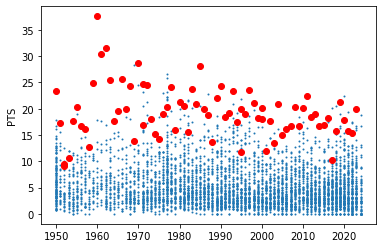

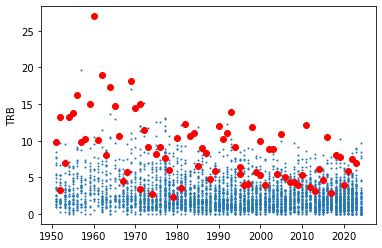

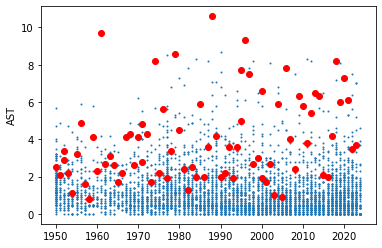

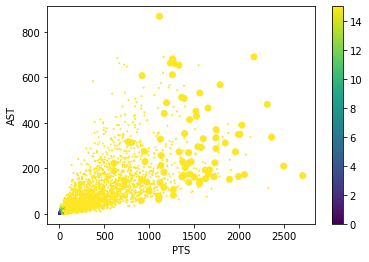

In [68]:
all_dfs_together = df_not_nested


import matplotlib.pyplot as plt

is_roty = all_dfs_together['ROTY']

plt.figure()
plt.scatter( all_dfs_together['SEASON'] , all_dfs_together['PTS_pergame'] , s=1)
plt.scatter( all_dfs_together['SEASON'][is_roty>0] , all_dfs_together['PTS_pergame'][is_roty>0] , c='r' )
#plt.xlim(1975,1980)
plt.ylabel('PTS')

plt.figure()
plt.scatter( all_dfs_together['SEASON'] , all_dfs_together['TRB_pergame'] , s=1)
plt.scatter( all_dfs_together['SEASON'][is_roty>0] , all_dfs_together['TRB_pergame'][is_roty>0] , c='r' )
plt.ylabel('TRB')

plt.figure()
plt.scatter( all_dfs_together['SEASON'] , all_dfs_together['AST_pergame'] , s=1)
plt.scatter( all_dfs_together['SEASON'][is_roty>0] , all_dfs_together['AST_pergame'][is_roty>0] , c='r' )
plt.ylabel('AST')

plt.figure()
plt.scatter( all_dfs_together['PTS'] , all_dfs_together['AST'] , s=1 , c=all_dfs_together['TRB'],vmin=0,vmax=15)
plt.scatter( all_dfs_together['PTS'][is_roty>0] , all_dfs_together['AST'][is_roty>0] , c=all_dfs_together['TRB'][is_roty>0] ,vmin=0,vmax=15)
plt.colorbar()
plt.xlabel('PTS')
plt.ylabel('AST')

In [71]:
all_dfs_together.to_csv('all_rookie_seasons_fullstats.csv',index=False)